Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [203]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import numpy as np
import matplotlib.pyplot as plt


In [204]:
#Objective 2.
#Select a number of asset classes ( > 1 ) and a number of observations ( > 500 ).  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.


no_of_asset_classes = 5
no_of_observations = 1400

In [205]:
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 10000

In [206]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [207]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    weights_sum = sum(random_asset_weights)
    random_asset_weights = random_asset_weights/weights_sum
    return np.asmatrix(random_asset_weights)  

get_random_asset_weights(no_of_asset_classes)


matrix([[0.03304209, 0.10248593, 0.24506804, 0.42597504, 0.19342891]])

In [208]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means.T
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean.item(), portfolio_standard_deviation.item(), portfolio_sharpe_ratio.item()

In [209]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.


while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    
    pf_mean, pf_std, pf_shr = get_portfolio_statistics(
        asset_weights=random_asset_weights,
        matrix_of_return_values=matrix_of_return_values)
    
    portfolio_means.append(pf_mean)
    portfolio_standard_deviations.append(pf_std)
    portfolio_sharpe_ratios.append(pf_shr)
       

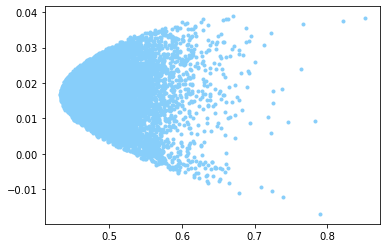

In [210]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [211]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index = np.argmax(portfolio_sharpe_ratios)

In [212]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print("collection of random asset weights:",collection_of_random_asset_weights[index])
print("portfolio of sharpe ratios:",portfolio_sharpe_ratios[index])

collection of random asset weights: [[0.00508621 0.22264356 0.38376081 0.30487457 0.08363484]]
portfolio of sharpe ratios: 0.062204107410732644


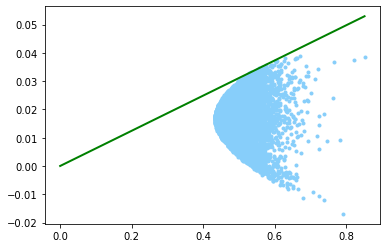

In [213]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

In [214]:
#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

-- Please write Your Answer Here --

A risk free rate would affect portfolio sharp ratio calculated above to be as follows:

portfolio_sharpe_ratio = (portfolio_mean - portfolio_risk_free_rate) / portfolio_standard_deviation

The following lines will explain how this new equation can be applied assuming that the risk free rate equals 2.5% 



In [215]:
# Assuming that the risk free rate equals 2.5% 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = (asset_weights * asset_means.T) - 0.025
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean.item(), portfolio_standard_deviation.item(), portfolio_sharpe_ratio.item()


In [216]:
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    
    pf_mean, pf_std, pf_shr = get_portfolio_statistics(
        asset_weights=random_asset_weights,
        matrix_of_return_values=matrix_of_return_values)
    
    portfolio_means.append(pf_mean)
    portfolio_standard_deviations.append(pf_std)
    portfolio_sharpe_ratios.append(pf_shr)
       

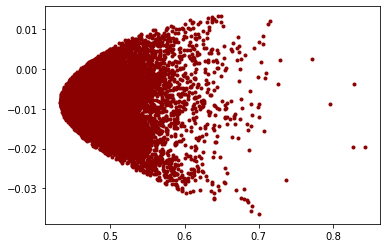

In [217]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'darkred') 
plt.show()

In [218]:
index = np.argmax(portfolio_sharpe_ratios)

In [219]:
print("collection of random asset weights:",collection_of_random_asset_weights[index])
print("portfolio of sharpe ratios:",portfolio_sharpe_ratios[index])

# we can notice that the portfolio of sharpe ratios has dropped down which indicates that we've been given 
# less expected return (reward) per unit of risk (volatility)

collection of random asset weights: [[0.01231775 0.03138198 0.45579631 0.46388182 0.03662213]]
portfolio of sharpe ratios: 0.020510731302537142


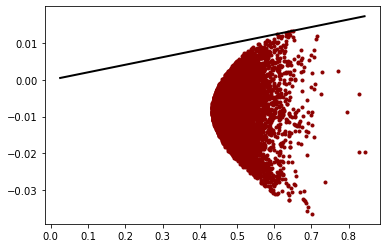

In [220]:
x = np.linspace(0.025, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'darkred')
plt.plot(x, y, '-', linewidth = 2, color = 'black')
plt.show()

# The plot below does not show a point of tangency (tangent portfolio) 
# since the capital market line is not tangenet with the efficient frontier line
# The efficient frontier here offers portfolios with low expected returns for high levels of risk
